In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [13]:
data = [
    {
      "model": "GPT-4.5",
      "provider": "OpenAI",
      "input_cost_per_million": 75.00,
      "output_cost_per_million": 150.00
    },
    {
      "model": "GPT-4o",
      "provider": "OpenAI",
      "input_cost_per_million": 5.00,
      "output_cost_per_million": 15.00
    },
    {
      "model": "GPT-4-turbo",
      "provider": "OpenAI",
      "input_cost_per_million": 10.00,
      "output_cost_per_million": 30.00
    },
    {
      "model": "GPT-4",
      "provider": "OpenAI",
      "input_cost_per_million": 30.00,
      "output_cost_per_million": 60.00
    },
    {
      "model": "GPT-3.5 Turbo",
      "provider": "OpenAI",
      "input_cost_per_million": 0.50,
      "output_cost_per_million": 1.50
    },
    {
      "model": "o3-mini",
      "provider": "OpenAI",
      "input_cost_per_million": 1.10,
      "output_cost_per_million": 4.40
    },
    {
      "model": "o1-pro",
      "provider": "OpenAI",
      "input_cost_per_million": 150.00,
      "output_cost_per_million": 600.00
    },
    {
      "model": "Claude Opus",
      "provider": "Anthropic",
      "input_cost_per_million": 15.00,
      "output_cost_per_million": 75.00
    },
    {
      "model": "Claude 3.7 Sonnet",
      "provider": "Anthropic",
      "input_cost_per_million": 3.00,
      "output_cost_per_million": 15.00
    },
    {
      "model": "Claude Haiku",
      "provider": "Anthropic",
      "input_cost_per_million": 0.25,
      "output_cost_per_million": 1.25
    },
    {
      "model": "Gemini 2.5 Pro (≤200K tokens)",
      "provider": "Google",
      "input_cost_per_million": 1.25,
      "output_cost_per_million": 10.00
    },
    {
      "model": "Gemini 2.5 Pro (>200K tokens)",
      "provider": "Google",
      "input_cost_per_million": 2.50,
      "output_cost_per_million": 15.00
    },
    {
      "model": "Gemini 2.0 Flash",
      "provider": "Google",
      "input_cost_per_million": 0.10,
      "output_cost_per_million": 0.40
    },
    {
      "model": "Gemini 1.5 Pro (≤128K tokens)",
      "provider": "Google",
      "input_cost_per_million": 3.50,
      "output_cost_per_million": 10.50
    },
    {
      "model": "Gemini 1.5 Pro (>128K tokens)",
      "provider": "Google",
      "input_cost_per_million": 7.00,
      "output_cost_per_million": 21.00
    },
    {
      "model": "Gemini 1.5 Flash (≤128K tokens)",
      "provider": "Google",
      "input_cost_per_million": 0.35,
      "output_cost_per_million": 0.53
    },
    {
      "model": "Gemini 1.5 Flash (>128K tokens)",
      "provider": "Google",
      "input_cost_per_million": 0.70,
      "output_cost_per_million": 1.05
    },
    {
      "model": "Llama 3 70B",
      "provider": "Groq",
      "input_cost_per_million": 0.59,
      "output_cost_per_million": 0.79
    },
    {
      "model": "Llama 3 8B",
      "provider": "Groq",
      "input_cost_per_million": 0.05,
      "output_cost_per_million": 0.10
    },
    {
      "model": "Mixtral 8x7B SMoE",
      "provider": "Groq",
      "input_cost_per_million": 0.24,
      "output_cost_per_million": 0.24
    },
    {
      "model": "Gemma 7B",
      "provider": "Groq",
      "input_cost_per_million": 0.10,
      "output_cost_per_million": 0.10
    },
    {
      "model": "R1",
      "provider": "DeepSeek",
      "input_cost_per_million": 0.55,
      "output_cost_per_million": 2.19
    }
  ]


In [14]:
df = pd.DataFrame(data)

/var/folders/hz/3q2hm1rd5h3dlkgh6ph5b17h0000gn/T/ipykernel_65935/1741125710.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.sort_values("RAG_cost", ascending=False), x="model", y="RAG_cost", ax=axs[1], palette="Blues_d")
/var/folders/hz/3q2hm1rd5h3dlkgh6ph5b17h0000gn/T/ipykernel_65935/1741125710.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.sort_values("Conversational_cost", ascending=False), x="model", y="Conversational_cost", ax=axs[2], palette="Oranges_d")


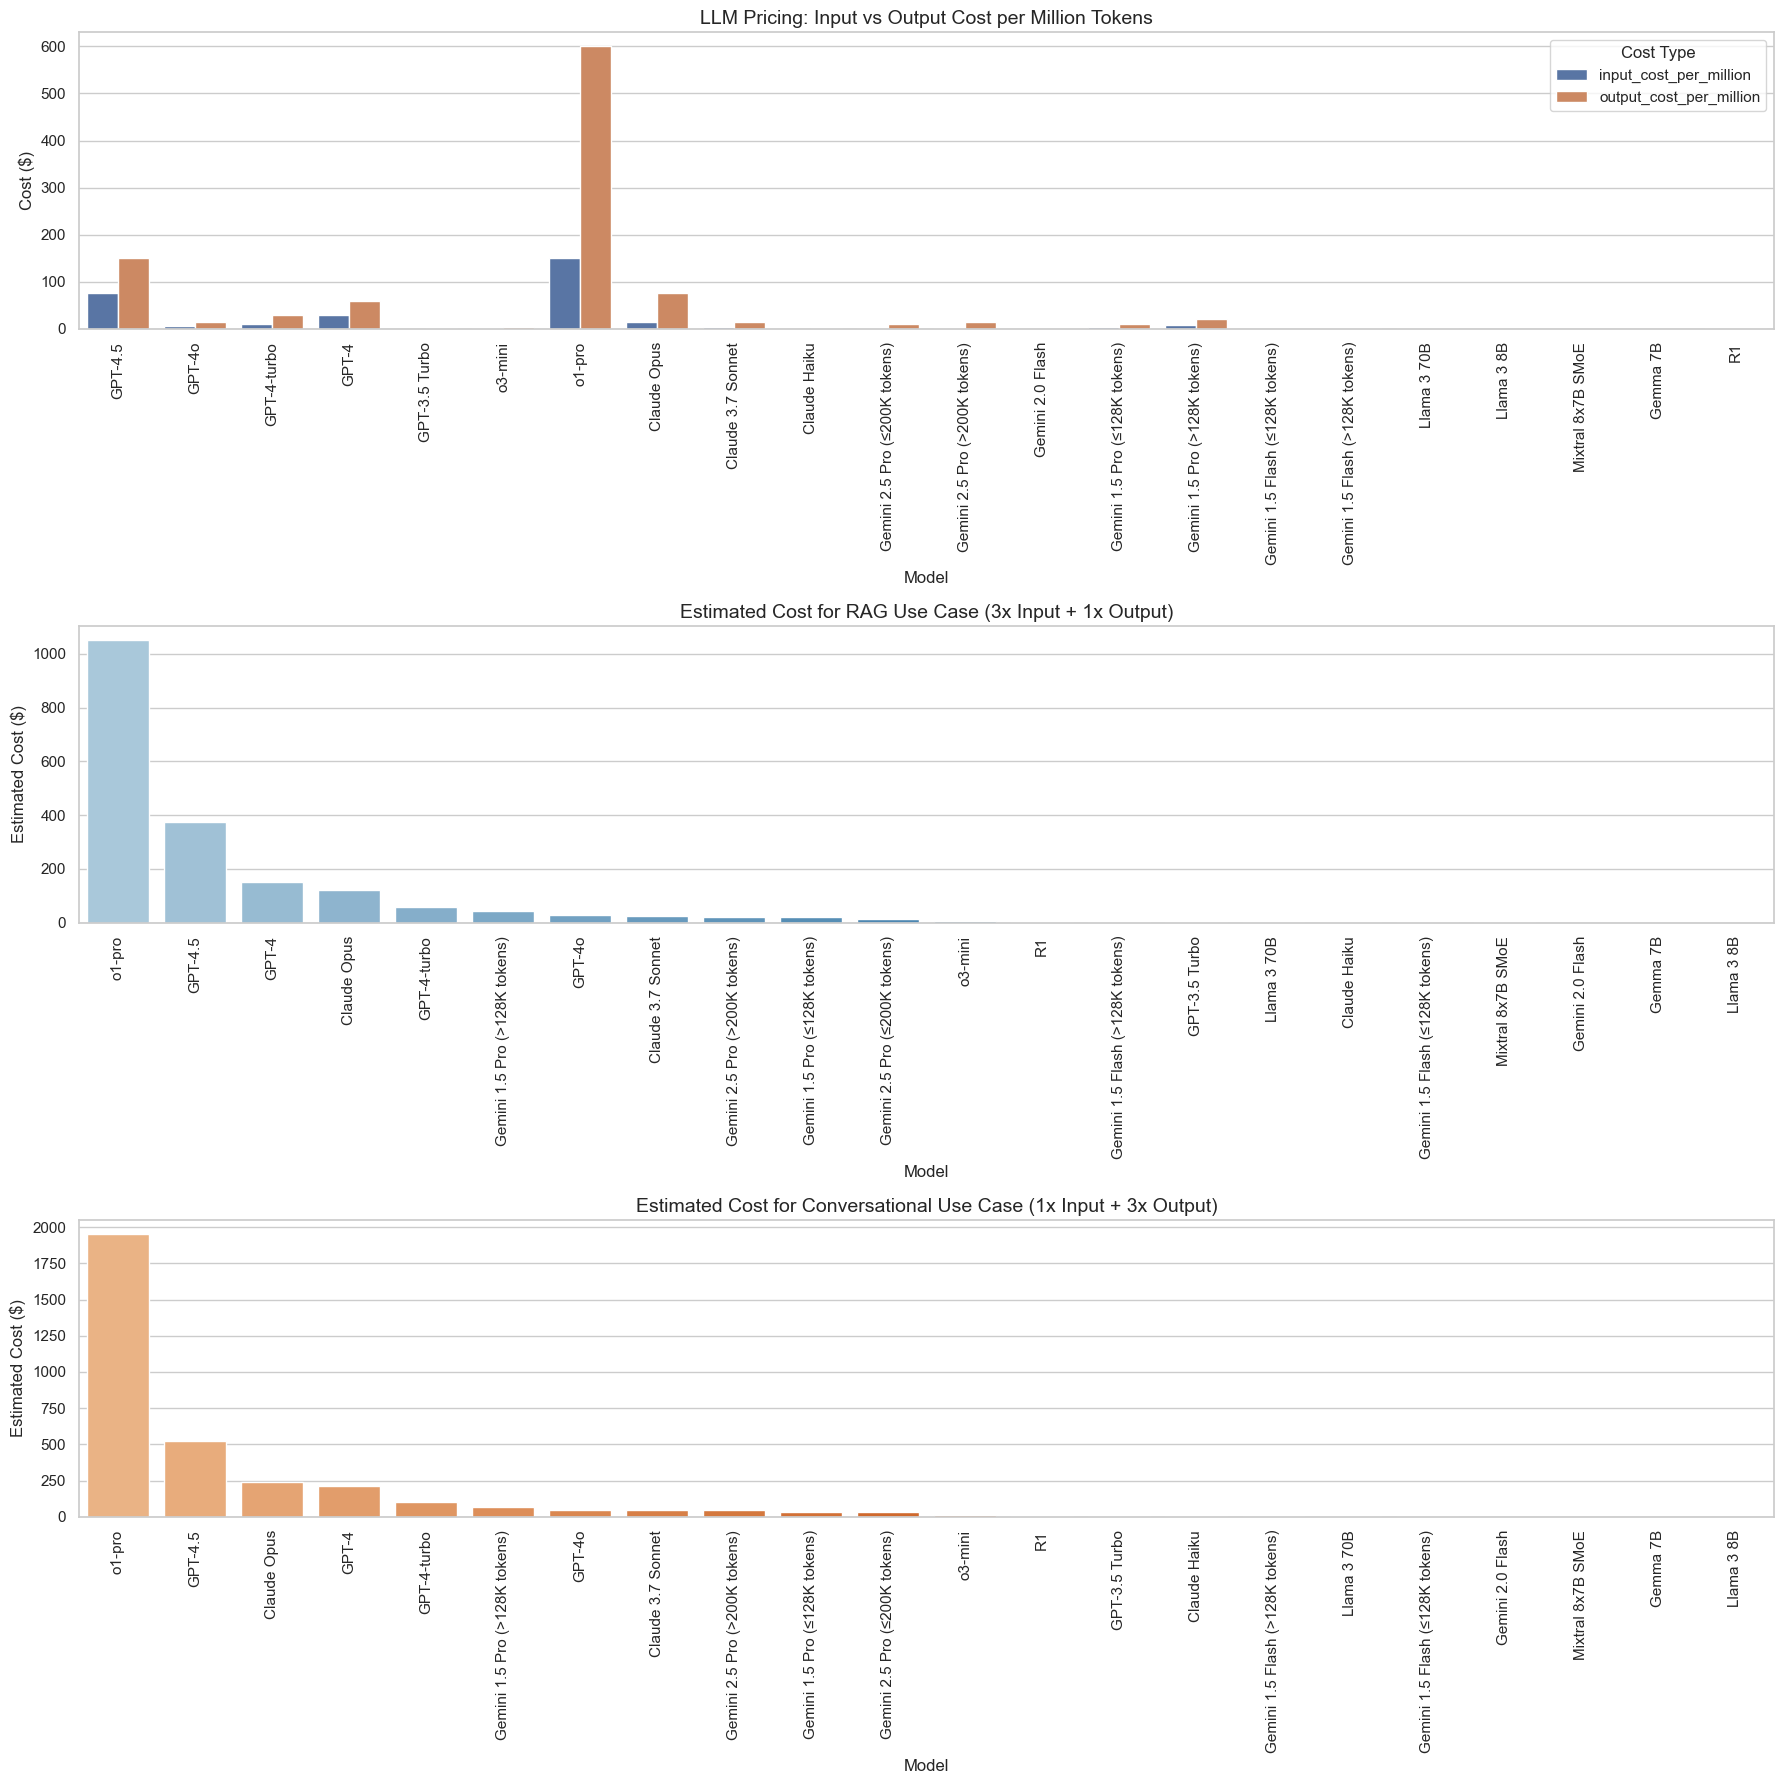

In [15]:
df_melted = df.melt(id_vars=["model"], value_vars=["input_cost_per_million", "output_cost_per_million"],
                    var_name="Cost Type", value_name="Cost")

# Graph 2: RAG use case (3x Input, 1x Output)
df["RAG_cost"] = df["input_cost_per_million"] * 3 + df["output_cost_per_million"] * 1

# Graph 3: Conversational use case (1x Input, 3x Output)
df["Conversational_cost"] = df["input_cost_per_million"] * 1 + df["output_cost_per_million"] * 3

# Plot setup
sns.set(style="whitegrid")
fig, axs = plt.subplots(3, 1, figsize=(18, 18))

# Plot 1: Input vs Output
sns.barplot(data=df_melted, x="model", y="Cost", hue="Cost Type", ax=axs[0])
axs[0].set_title("LLM Pricing: Input vs Output Cost per Million Tokens", fontsize=14)
axs[0].set_xlabel("Model")
axs[0].set_ylabel("Cost ($)")
axs[0].tick_params(axis='x', rotation=90)

# Plot 2: RAG Scenario
sns.barplot(data=df.sort_values("RAG_cost", ascending=False), x="model", y="RAG_cost", ax=axs[1], palette="Blues_d")
axs[1].set_title("Estimated Cost for RAG Use Case (3x Input + 1x Output)", fontsize=14)
axs[1].set_xlabel("Model")
axs[1].set_ylabel("Estimated Cost ($)")
axs[1].tick_params(axis='x', rotation=90)

# Plot 3: Conversational Scenario
sns.barplot(data=df.sort_values("Conversational_cost", ascending=False), x="model", y="Conversational_cost", ax=axs[2], palette="Oranges_d")
axs[2].set_title("Estimated Cost for Conversational Use Case (1x Input + 3x Output)", fontsize=14)
axs[2].set_xlabel("Model")
axs[2].set_ylabel("Estimated Cost ($)")
axs[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

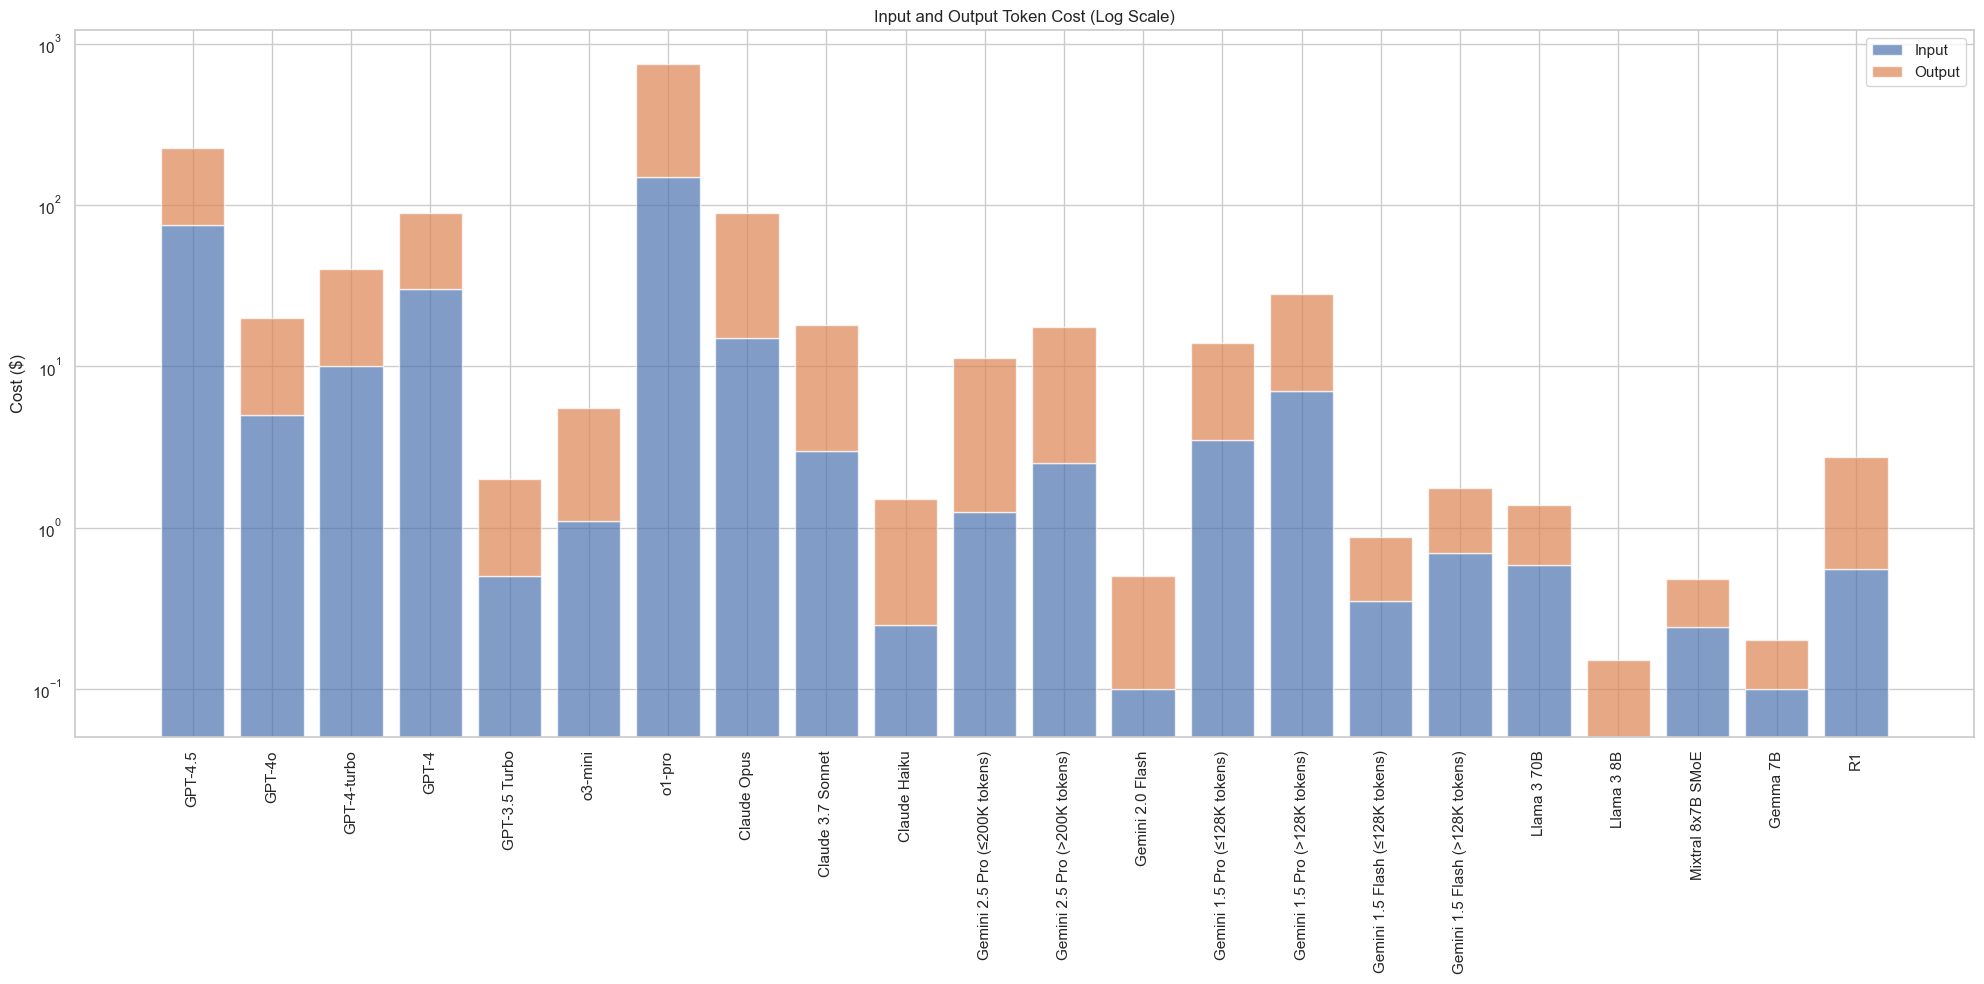

In [19]:
df["rag_cost"] = df["input_cost_per_million"] * 3 + df["output_cost_per_million"] * 1
df["chat_cost"] = df["input_cost_per_million"] * 1 + df["output_cost_per_million"] * 3

# Plotting
fig, axs = plt.subplots(1, 1, figsize=(20, 10), sharex=True)

# 1. Input vs Output Token Cost
axs.bar(df["model"], df["input_cost_per_million"], label="Input", alpha=0.7)
axs.bar(df["model"], df["output_cost_per_million"], bottom=df["input_cost_per_million"], label="Output", alpha=0.7)
axs.set_title("Input and Output Token Cost (Log Scale)")
axs.set_ylabel("Cost ($)")
axs.set_yscale("log")
axs.legend()
axs.tick_params(axis='x', rotation=90)

# # 2. RAG Scenario: 3x Input, 1x Output
# axs[1].bar(df["model"], df["rag_cost"], color='mediumseagreen')
# axs[1].set_title("RAG Cost Estimate (3x Input, 1x Output) - Log Scale")
# axs[1].set_ylabel("Cost ($)")
# axs[1].set_yscale("log")
# axs[1].tick_params(axis='x', rotation=90)

# # 3. Conversational Scenario: 1x Input, 3x Output
# axs[2].bar(df["model"], df["chat_cost"], color='mediumpurple')
# axs[2].set_title("Conversational Cost Estimate (1x Input, 3x Output) - Log Scale")
# axs[2].set_ylabel("Cost ($)")
# axs[2].set_yscale("log")
# axs[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

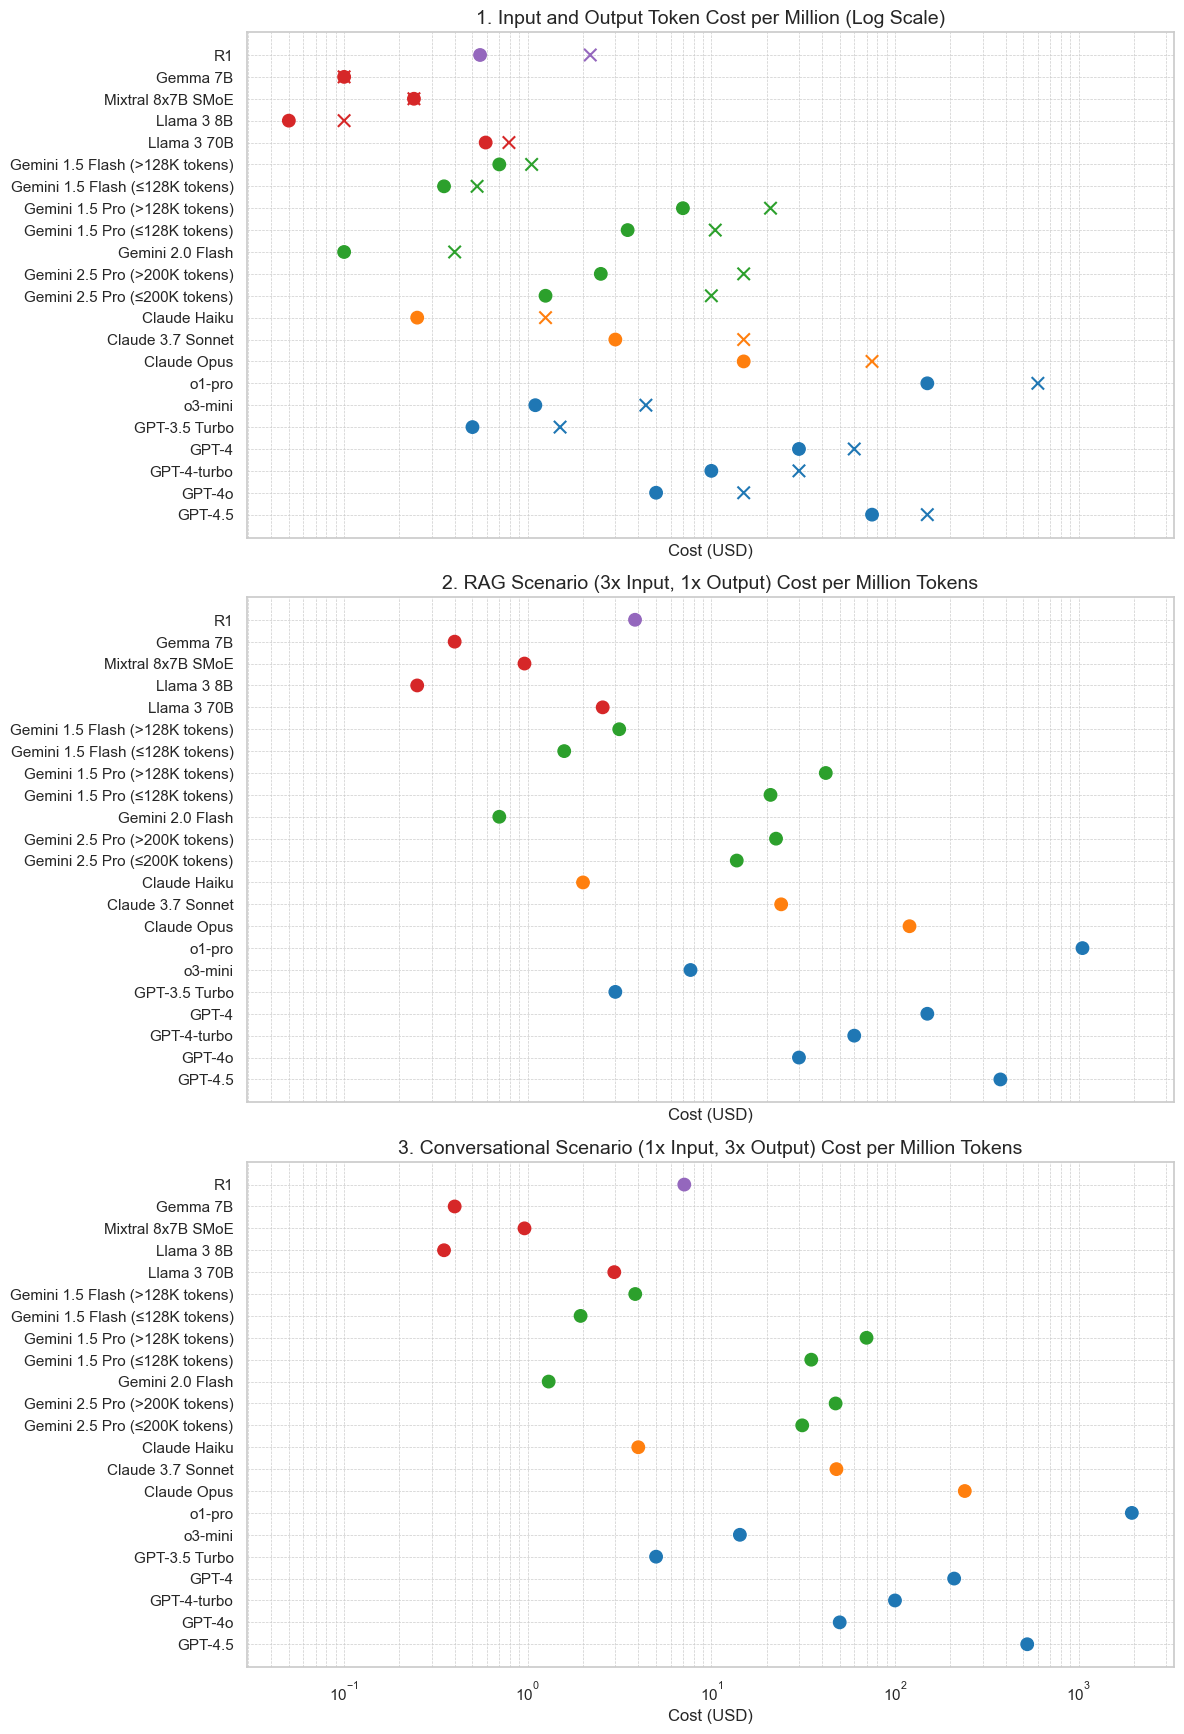

In [9]:
df["RAG_Cost"] = 3 * df["input_cost_per_million"] + 1 * df["output_cost_per_million"]
df["Conversational_Cost"] = 1 * df["input_cost_per_million"] + 3 * df["output_cost_per_million"]

# Set colors by provider
colors = {
    "OpenAI": "#1f77b4",
    "Anthropic": "#ff7f0e",
    "Google": "#2ca02c",
    "Groq": "#d62728",
    "DeepSeek": "#9467bd"
}
df["color"] = df["provider"].map(colors)

# Plot
fig, axs = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# 1. Dot plot for Input and Output Token Cost
axs[0].scatter(df["input_cost_per_million"], df["model"], c=df["color"], label="Input", s=80, marker='o')
axs[0].scatter(df["output_cost_per_million"], df["model"], c=df["color"], label="Output", s=80, marker='x')
axs[0].set_xscale("log")
axs[0].set_title("1. Input and Output Token Cost per Million (Log Scale)", fontsize=14)
axs[0].set_xlabel("Cost (USD)", fontsize=12)
axs[0].grid(True, which="both", linestyle="--", linewidth=0.5)

# 2. RAG Scenario
axs[1].scatter(df["RAG_Cost"], df["model"], c=df["color"], s=80)
axs[1].set_xscale("log")
axs[1].set_title("2. RAG Scenario (3x Input, 1x Output) Cost per Million Tokens", fontsize=14)
axs[1].set_xlabel("Cost (USD)", fontsize=12)
axs[1].grid(True, which="both", linestyle="--", linewidth=0.5)

# 3. Conversational Scenario
axs[2].scatter(df["Conversational_Cost"], df["model"], c=df["color"], s=80)
axs[2].set_xscale("log")
axs[2].set_title("3. Conversational Scenario (1x Input, 3x Output) Cost per Million Tokens", fontsize=14)
axs[2].set_xlabel("Cost (USD)", fontsize=12)
axs[2].grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

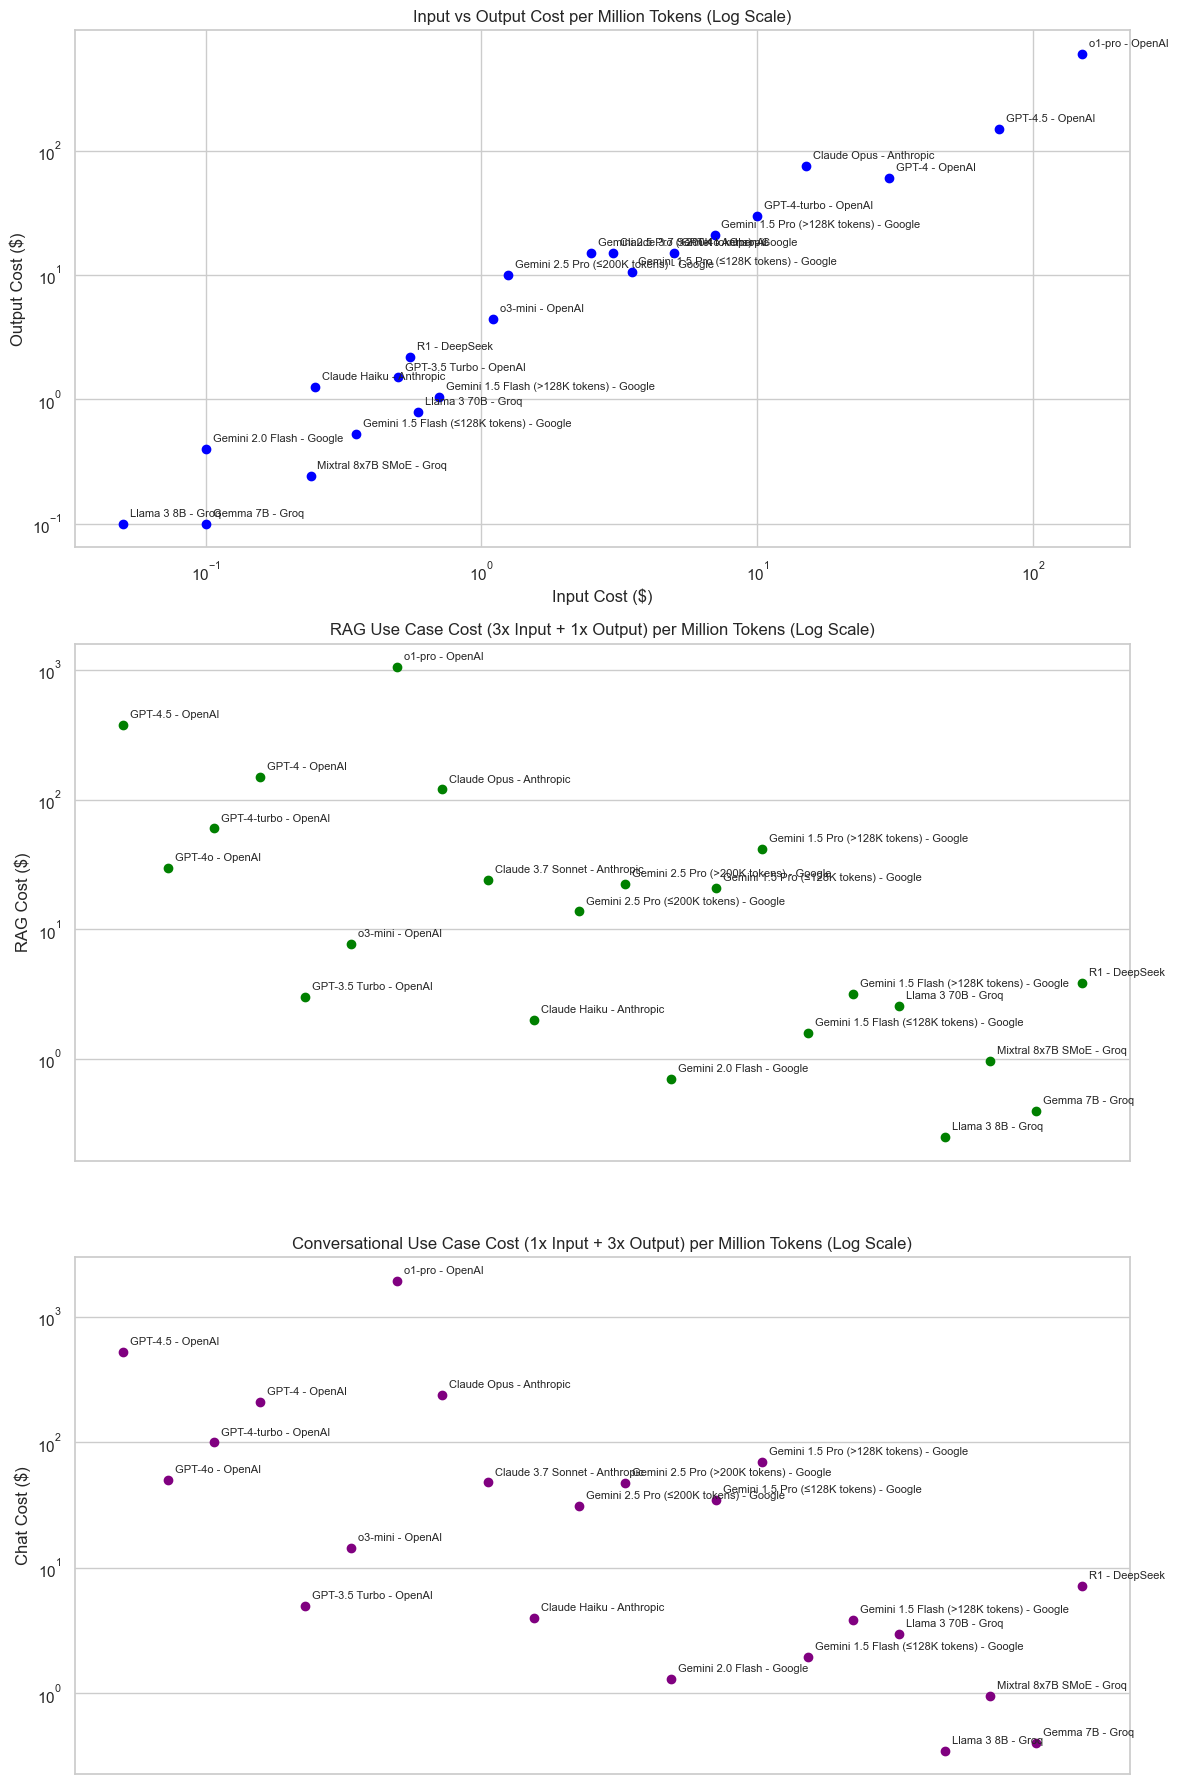

In [10]:
df["label"] = df["model"] + " - " + df["provider"]

# Derived total costs
df["RAG_cost"] = 3 * df["input_cost_per_million"] + 1 * df["output_cost_per_million"]
df["Chat_cost"] = 1 * df["input_cost_per_million"] + 3 * df["output_cost_per_million"]

# Plot config
plt.style.use("seaborn-v0_8-colorblind")
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# --- Graph 1: Input vs Output Token Cost ---
axes[0].scatter(df['input_cost_per_million'], df['output_cost_per_million'], c='blue')
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_title("Input vs Output Cost per Million Tokens (Log Scale)")
axes[0].set_xlabel("Input Cost ($)")
axes[0].set_ylabel("Output Cost ($)")

for i, row in df.iterrows():
    axes[0].annotate(row['label'], (row['input_cost_per_million'], row['output_cost_per_million']),
                     xytext=(5, 5), textcoords='offset points', fontsize=8)

# --- Graph 2: RAG usage cost ---
axes[1].scatter(range(len(df)), df['RAG_cost'], c='green')
axes[1].set_yscale('log')
axes[1].set_title("RAG Use Case Cost (3x Input + 1x Output) per Million Tokens (Log Scale)")
axes[1].set_ylabel("RAG Cost ($)")
axes[1].set_xticks([])

for i, row in df.iterrows():
    axes[1].annotate(row['label'], (i, row['RAG_cost']),
                     xytext=(5, 5), textcoords='offset points', fontsize=8)

# --- Graph 3: Conversational usage cost ---
axes[2].scatter(range(len(df)), df['Chat_cost'], c='purple')
axes[2].set_yscale('log')
axes[2].set_title("Conversational Use Case Cost (1x Input + 3x Output) per Million Tokens (Log Scale)")
axes[2].set_ylabel("Chat Cost ($)")
axes[2].set_xticks([])

for i, row in df.iterrows():
    axes[2].annotate(row['label'], (i, row['Chat_cost']),
                     xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.savefig('llm_cost_comparison.png', dpi=300)
plt.show()